In [101]:
include("../quant_gen_code/tufto_2001.jl")

using Plots; gr(legend=false)

# as: arrow head size 0-1 (fraction of arrow length)
# la: arrow alpha transparency 0-1
function arrow0!(x, y, u, v; as=0.07, lc=:black, la=1)
    nuv = sqrt(u^2 + v^2)
    v1, v2 = [u;v] / nuv,  [-v;u] / nuv
    v4 = (3*v1 + v2)/3.1623  # sqrt(10) to get unit vector
    v5 = v4 - 2*(v4'*v2)*v2
    v4, v5 = as*nuv*v4, as*nuv*v5
    plot!([x,x+u], [y,y+v], lc=lc,la=la)
    plot!([x+u,x+u-v5[1]], [y+v,y+v-v5[2]], lc=lc, la=la)
    plot!([x+u,x+u-v4[1]], [y+v,y+v-v4[2]], lc=lc, la=la)
end



arrow0! (generic function with 1 method)

In [ ]:
using Plots
using NLsolve
using DifferentialEquations
using LinearAlgebra

### Reproducing and expanding analysis of Tufto 2001

Tufto 2001 present a simple continuous time model that describes the effect of migrants entering a populaiton that are maladapted to local conditions. This process effects the size of the populaiton through two paths. The first effect is a direct increase due to the presence of migrants, a demogrpahic effect. The second efect is a reduction in fittness due to the introduction of traits not adapted to the local conditions, a genetic effect. The genetic effect can result in a positive feedback that magnifies the effect because the size of the genetic effect dependes on the rate of migration into the populaiton, which is the number of migrants per individual in the populaiton. As a consequence if the popualtion size is reduced through the geneti effects, these effects can become stronger resulting in furter reductions in populaiton size. For some paramter values this can even produce alternative stable states. 

This model is useful for thinking about the use of artificail propogation in the conservaiton of endangered species, and for the enhancement of natural resources. Artificail propogation is a mainstay of many fisheires, perticualrly salmonids and is common in forestry. Individuals raised in captivity can develop adaptations to the captive breading and reering environment than are disadvantagious in the wild, the escape of these individuals into the wild population can lead to the dynamics described in Tufto 2001. 

The derivation of the model can be found in the original paper, so I will not describe it at length here, but in short the model tracks two paramters, the population size $N$ and the mean trait value $\bar{z}$. The trait value represents some combination of quatitative traits with an underlying genetic archetcture of many unlinked loci with small additive effect, that influence the fittness of each individuas. This trait is under stabalizing selection with strength $s$ areount a ean of $0$ w.l.o.g. the mean trait value of migratns is given by $z_1$ and the number of migrants per time is given by $m$. the demographics of the population are described by logistic populaiton growth with paramteres $r$ and $K$, and the griwth rate is modified as a function of the mean trait value $\bar{z}$, the variance of the trait $V$ and the strnegth of selection $s$. These assumptions can be captured by equations 1 and 2

$$
\dfrac{dN}{dt} = N\left(r(1-N/K) - \frac{s}{2}(V-\bar{z}^2)\right)+m \\
\dfrac{dz}{dt} = -Vs\bar{z} - \frac{m}{N}(\bar{z} - z_1)
$$

[0.5484115707250506 0.29244086935302; 0.017184607943474293 2.6047632836858443; 0.059044061185942326 1.6048558545154403]

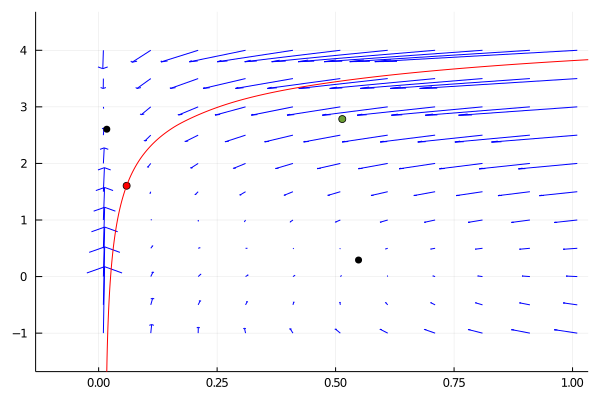

In [511]:
#include("../quant_gen_code/tufto_2001.jl")
par = tufto_2001.params
par[6] = 0.05
p1 = tufto_2001.phase_portrait(par)
par[6] = 2.0
eqs = tufto_2001.get_zeros(par, 100; tol = 0.00001)
Plots.scatter!(p1, eqs[:,1],eqs[:,2])

[0.36572790883237466 0.6210984686638831; 0.04410615972274154 2.415343528815248; 0.07679526682575089 1.8671263328206913]

┌ Warning: dt <= dtmin. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase /Users/johnbuckner/.julia/packages/SciMLBase/DXiE6/src/integrator_interface.jl:345
┌ Warning: dt <= dtmin. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase /Users/johnbuckner/.julia/packages/SciMLBase/DXiE6/src/integrator_interface.jl:345


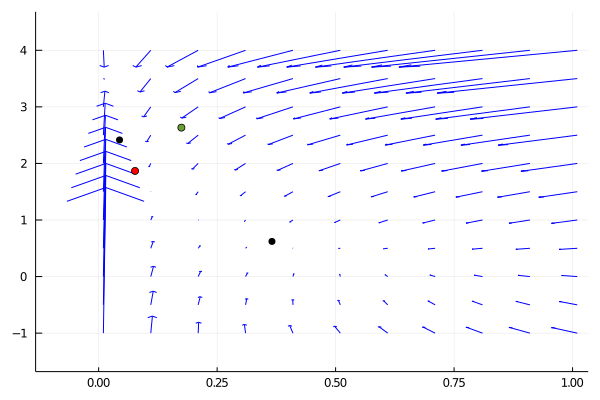

In [565]:
par = [1.0,1,1.75,0.85,4,0.0]
par[6] = 0.1
p1 = tufto_2001.phase_portrait(par)
par[6] = 0.5
eqs = tufto_2001.get_zeros(par, 100; tol = 0.00001)
Plots.scatter!(p1, eqs[:,1],eqs[:,2])

!!

┌ Warning: dt <= dtmin. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase /Users/johnbuckner/.julia/packages/SciMLBase/DXiE6/src/integrator_interface.jl:345


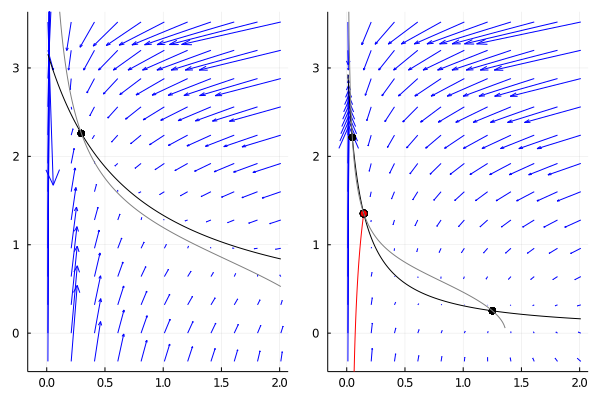

In [953]:
include("../quant_gen_code/tufto_2001.jl")

lambda = 0.7
sigma = 3.2
mu = 1.0
par = [lambda,sigma,mu]


p1 = tufto_2001.phase_portrait_nd(par)
lambda = 0.7
sigma = 3.2
mu = 0.15
par = [lambda,sigma,mu]
p2 = tufto_2001.phase_portrait_nd(par)

plot(p1,p2)

┌ Warning: dt <= dtmin. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase /Users/johnbuckner/.julia/packages/SciMLBase/DXiE6/src/integrator_interface.jl:345


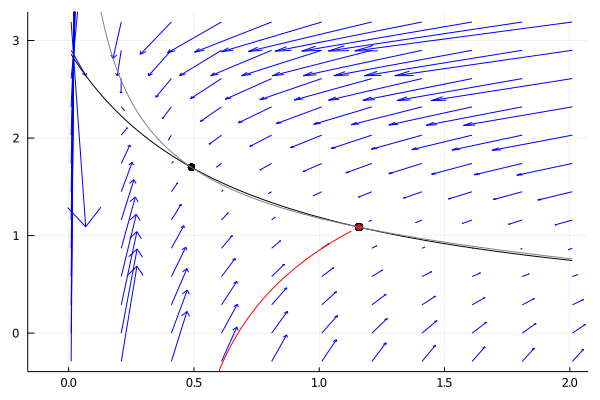

In [1010]:
#include("../quant_gen_code/tufto_2001.jl")

lambda = 0.9
sigma = 2.9
mu = 1.25
par = [lambda,sigma,mu]
p2 = tufto_2001.phase_portrait_nd(par)

p2

In [1017]:
lambda = 0.5
sigma = 3.32
mu = 0.2
par = [lambda,sigma,mu]

eqs1 = []
eqs2 = []
mu = []
for i in 0.01:0.01:2.01
    par[3] = i
    v = tufto_2001.get_zeros_nd(par,100)
    m = repeat([i], length(v[:,1]))
    eqs1 = vcat(eqs1,v[:,1])
    eqs2 = vcat(eqs2,v[:,2])
    mu = vcat(mu,m)
end
Plots.scatter(mu,eqs1)
Plots.scatter!(mu,eqs2)

LoadError: [91mUndefVarError: path not defined[39m

In [1018]:
Plots.scatter(mu,eqs1)
Plots.scatter!(mu,eqs2)

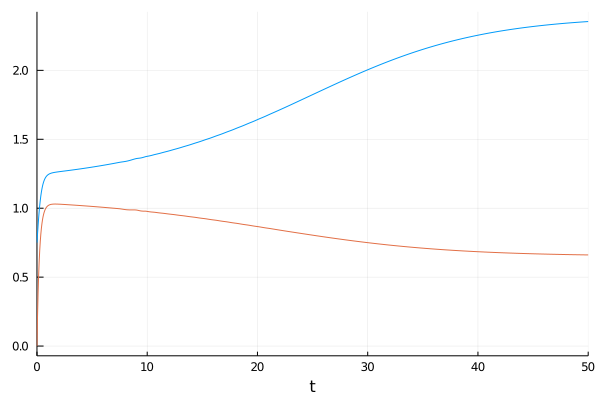

In [1015]:

lambda = 0.9
sigma = 2.9
mu = 1.25
par = [lambda,sigma,mu]
u0 = [0.75,0.0]

f(u,p,t) = tufto_2001.derivitives_nd(u,par)
tspan = (0.0,50)
prob = ODEProblem(f,u0,tspan)
sol = solve(prob)
Plots.plot(sol)

!!!!

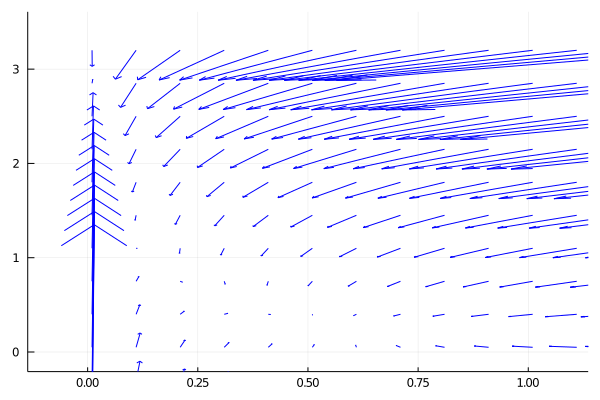

In [680]:
include("../quant_gen_code/utils.jl")
include("../quant_gen_code/tufto_2001.jl")


lambda = 1
sigma = 3.5
mu = 0.05


Ns = 0.01:0.1:1.5
vs = -:(sigma/10):sigma

par = [lambda,sigma,mu]
df(x) = tufto_2001.derivitives_nd(x,par)./10
xxs = [N for N in Ns for v in vs]
yys = [v for N in Ns for v in vs]
uv = mapslices(df, hcat(xxs,yys), dims = 2)

# plot points and arrows with 10% head sizes
p1 = Plots.scatter(ylim = [-0.1,sigma],xlim = [-0.1,1.1])
for (x,y,u,v) in zip(xxs,yys,uv[:,1],uv[:,2])
    utils.arrow0!( x, y, u, v; as=0.1, lc=:blue, la=1)
end

p1

In [337]:
# find fixed points
include("../quant_gen_code/tufto_2001.jl")

par = tufto_2001.params
par[6] = 0.1
function f!(f,x)
    f[1] = tufto_2001.derivitives(x,par)[1]
    f[2] = tufto_2001.derivitives(x,par)[2]
    #return tufto_2001.derivitives(x,par)
end

function J!(J,x)
    J1 = tufto_2001.jacobian(x,par)
    J[1,1] = J1[1,1]
    J[2,1] = J1[2,1]
    J[1,2] = J1[1,2]
    J[2,2] = J1[2,2]
end 

NLsolve.nlsolve(f!,J!,[0.25 1.0], method = :newton, iterations = 100000)#, method = :newton


Results of Nonlinear Solver Algorithm
 * Algorithm: Newton with line-search
 * Starting Point: [0.25 1.0]
 * Zero: [0.2527691318160344 1.1338860572603744]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [316]:
using LinearAlgebra

In [324]:
J1 = tufto_2001.jacobian([0.2527691318160344, 1.1338860572603744],par)

2×2 Array{Float64,2}:
 -0.648387  -0.286611
 -4.48586   -1.39562

In [378]:
include("../quant_gen_code/tufto_2001.jl")
tufto_2001.get_zeros(par, 100; tol = 0.00001)

3×2 Array{Float64,2}:
 0.464036   0.709174
 0.252769   1.13389
 0.0195387  3.3462

In [380]:
include("../quant_gen_code/tufto_2001.jl")
eqs = tufto_2001.get_zeros(par, 100; tol = 0.00001)
tufto_2001.get_stability(eqs, par)

3×1 Array{Bool,2}:
 1
 1
 0

In [457]:
eigen(J1).vectors[:,1]

2-element Array{Float64,1}:
 0.17986768144409357
 0.9836908138088544

In [455]:
eigen(J1).vectors

2×2 Array{Float64,2}:
 0.179868   0.329867
 0.983691  -0.944028